<a href="https://colab.research.google.com/github/ColinIngo/UFC-Temple-DAC/blob/main/UFC_TDAC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Datasets

We start here with simply cleaning the data, as well as creating multiple sub-dataframes.

We also create multiple dummy variables so that we can quantitatively analyze the outcomes of fights.

We also create two separate dataframes in order to control for gender when comparing biometrics

In [ ]:

#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

#Creating dataframe
uncleaned_data = pd.read_csv('/content/drive/My Drive/UFC_TDAC/ufc-dataset.csv')
dataframe = uncleaned_data[
    (uncleaned_data['Finish'].notna()) & (uncleaned_data['Finish'] != 'DQ') & (uncleaned_data['Finish'] != 'Overturned') & (uncleaned_data['HeightDif'] > -100) & (uncleaned_data['ReachDif'] > -100 )
]

# Turning Finishes into a dummy variable and making height differences absolute
dataframe['Sub_dummy'] = np.where(dataframe['Finish'].isin(['KO/TKO', 'U-DEC', 'S-DEC', 'M-DEC', ]),0 ,1) ###----- 1 = submission, 0 = no submission
dataframe['KO_dummy'] = np.where(dataframe['Finish'].isin(['SUB', 'U-DEC', 'S-DEC', 'M-DEC']), 0, 1) ###----- 1 = ko, 0 = no ko
dataframe['Finish_dummy'] = np.where(dataframe['Finish'].isin(['U-DEC', 'S-DEC', 'M-DEC']), 0, 1) ###----- 1 = finish
dataframe['abs_HeightDif'] = abs(dataframe['HeightDif'])
dataframe['abs_ReachDif'] = abs(dataframe['ReachDif'])
dataframe['abs_AgeDif'] = abs(dataframe['AgeDif'])
dataframe['winner_dummy'] = np.where(dataframe['Winner'].isin(['Red']), 0, 1) ###----- 1 = Blue wins, 0 = Red wins


mens_dataframe = dataframe[(dataframe['Gender'] != 'FEMALE')]

womens_dataframe = dataframe[(dataframe['Gender'] != 'MALE')]

heavyweight_data = dataframe[dataframe['WeightClass'] == 'Heavyweight']


#Bar Graph showing how Finish Ratios change between weight classes

finish_ratios = dataframe.groupby('WeightClass')['Finish_dummy'].agg(['sum','count'])
finish_ratios['Finish_Ratio'] = finish_ratios['sum'] / finish_ratios['count']

ko_ratios = dataframe.groupby('WeightClass')['KO_dummy'].agg(['sum','count'])
ko_ratios['KO_Ratio'] = ko_ratios['sum'] / ko_ratios['count']

sub_ratios = dataframe.groupby('WeightClass')['Sub_dummy'].agg(['sum', 'count'])
sub_ratios['Sub_Ratio'] = sub_ratios['sum'] / sub_ratios['count']

weight_class_order = ["Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", "Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight", "Middleweight", "Light Heavyweight", "Heavyweight"]
finish_ratios = finish_ratios.reindex(weight_class_order)
ko_ratios = ko_ratios.reindex(weight_class_order)
sub_ratios = sub_ratios.reindex(weight_class_order)


dataframe.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-e5f53caa86c3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Sub_dummy'] = np.where(dataframe['Finish'].isin(['KO/TKO', 'U-DEC', 'S-DEC', 'M-DEC', ]),0 ,1) ###----- 1 = submission, 0 = no submission
<ipython-input-10-e5f53caa86c3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['KO_dummy'] = np.where(dataframe['Finish'].isin(['SUB', 'U-DEC', 'S-DEC', 'M-DEC']), 0, 1) ###----- 1 = ko, 0 = no ko
<ipython-input-10-e5f53caa86c3>:21: SettingWithCopyWarning: 
A value is

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,BSubOdds,RKOOdds,BKOOdds,Sub_dummy,KO_dummy,Finish_dummy,abs_HeightDif,abs_ReachDif,abs_AgeDif,winner_dummy
0,Alex Pereira,Jamahal Hill,-130.0,110.0,76.9231,110.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,1400.0,110.0,200.0,0,1,1,0.00,0.00,4,0
1,Zhang Weili,Yan Xiaonan,-455.0,350.0,21.9780,350.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,NaN,140.0,NaN,0,0,0,2.54,0.00,0,0
2,Justin Gaethje,Max Holloway,-185.0,154.0,54.0541,154.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,1600.0,150.0,550.0,0,1,1,0.00,2.54,3,1
3,Charles Oliveira,Arman Tsarukyan,190.0,-218.0,190.0000,45.8716,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,700.0,550.0,130.0,0,0,0,7.62,5.08,7,1
4,Bo Nickal,Cody Brundage,-1600.0,900.0,6.2500,900.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,3000.0,150.0,1400.0,1,0,1,2.54,10.16,1,0


# Fight results according to Height, Reach, and Age differences as absolute values

Fight ends in finish ~ height difference + reach difference + age difference

In [ ]:
# OLS Model
# Logit or probit
formula = 'Finish_dummy ~ abs_HeightDif + abs_ReachDif + abs_AgeDif'

model = sm.logit(formula, data=heavyweight_data)
results = model.fit()

print(results.summary())




Optimization terminated successfully.
         Current function value: 0.636830
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Finish_dummy   No. Observations:                  445
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                0.001126
Time:                        22:42:42   Log-Likelihood:                -283.39
converged:                       True   LL-Null:                       -283.71
Covariance Type:            nonrobust   LLR p-value:                    0.8875
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6617      0.210      3.147      0.002       0.250       1.074
abs_HeightDif    -0.

# Across Weight Classes


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, "Women's Strawweight"),
  Text(1, 0, "Women's Flyweight"),
  Text(2, 0, "Women's Bantamweight"),
  Text(3, 0, 'Flyweight'),
  Text(4, 0, 'Bantamweight'),
  Text(5, 0, 'Featherweight'),
  Text(6, 0, 'Lightweight'),
  Text(7, 0, 'Welterweight'),
  Text(8, 0, 'Middleweight'),
  Text(9, 0, 'Light Heavyweight'),
  Text(10, 0, 'Heavyweight')])

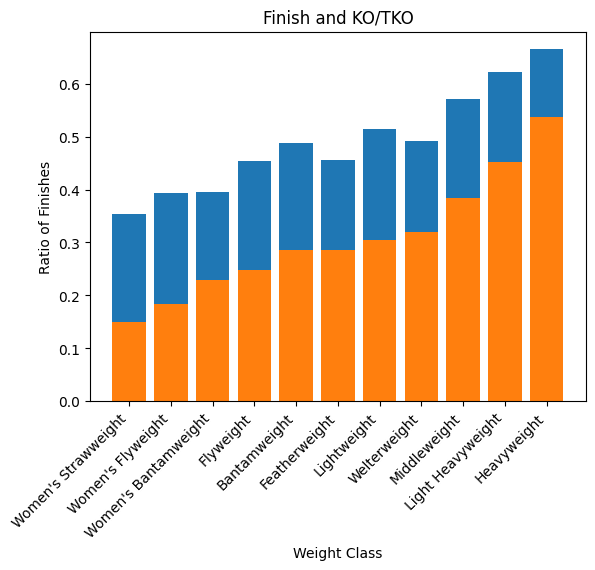

In [ ]:

plt.bar(finish_ratios.index, finish_ratios['Finish_Ratio'])
plt.bar(ko_ratios.index, ko_ratios['KO_Ratio'])
plt.bar()
plt.title('Finish and KO/TKO')
plt.xlabel("Weight Class")
plt.ylabel("Ratio of Finishes")
plt.xticks(rotation=45, ha='right')




In [ ]:
dataframe['AvgWeightLbs'] = (dataframe['BlueWeightLbs'] + dataframe['RedWeightLbs'])/2
formula2 = 'KO_dummy ~ AvgWeightLbs'
model2 = sm.logit(formula2, data = dataframe)

results2 = model2.fit()
print(results2.summary())
#print(finish_ratios['Finish_Ratio'])
#print(ko_ratios)



Optimization terminated successfully.
         Current function value: 0.611865
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               KO_dummy   No. Observations:                 5928
Model:                          Logit   Df Residuals:                     5926
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                 0.02823
Time:                        05:27:18   Log-Likelihood:                -3627.1
converged:                       True   LL-Null:                       -3732.5
Covariance Type:            nonrobust   LLR p-value:                 9.431e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6638      0.138    -19.236      0.000      -2.935      -2.392
AvgWeightLbs     0.0116

<ipython-input-13-f64965b4d57e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['AvgWeightLbs'] = (dataframe['BlueWeightLbs'] + dataframe['RedWeightLbs'])/2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, "Women's Strawweight"),
  Text(1, 0, "Women's Flyweight"),
  Text(2, 0, "Women's Bantamweight"),
  Text(3, 0, 'Flyweight'),
  Text(4, 0, 'Bantamweight'),
  Text(5, 0, 'Featherweight'),
  Text(6, 0, 'Lightweight'),
  Text(7, 0, 'Welterweight'),
  Text(8, 0, 'Middleweight'),
  Text(9, 0, 'Light Heavyweight'),
  Text(10, 0, 'Heavyweight')])

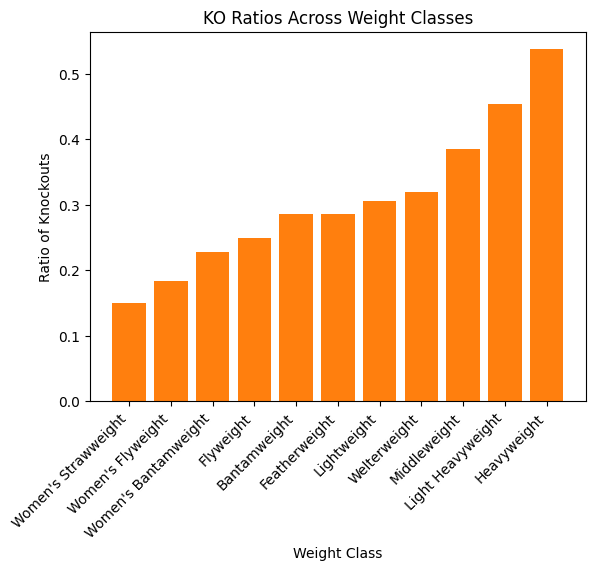

In [ ]:
#
plt.bar(ko_ratios.index, ko_ratios['KO_Ratio'], color='tab:orange')
plt.title('KO Ratios Across Weight Classes')
plt.xlabel("Weight Class")
plt.ylabel("Ratio of Knockouts")
plt.xticks(rotation=45, ha='right')

# Submission finishes across weight classes

Optimization terminated successfully.
         Current function value: 0.478647
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Sub_dummy   No. Observations:                 5928
Model:                          Logit   Df Residuals:                     5926
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                0.001718
Time:                        16:26:41   Log-Likelihood:                -2837.4
converged:                       True   LL-Null:                       -2842.3
Covariance Type:            nonrobust   LLR p-value:                  0.001779
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9734      0.167     -5.838      0.000      -1.300      -0.647
BlueWeightLbs    -0.

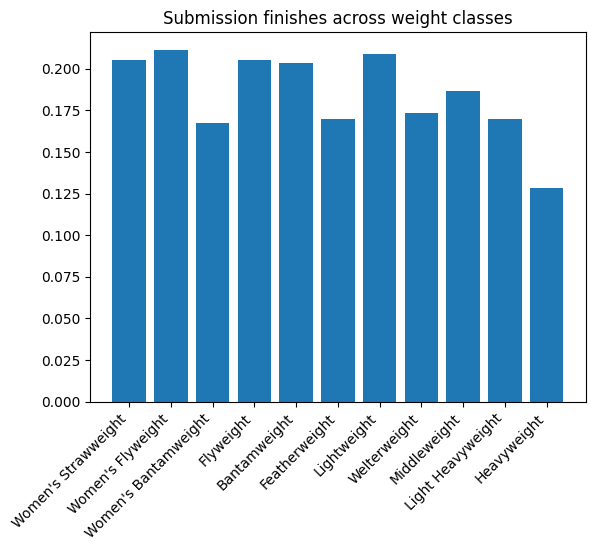

In [ ]:
#Bar graph showing submissions across weight classes

plt.bar(sub_ratios.index, sub_ratios['Sub_Ratio'])
plt.title("Submission finishes across weight classes")
plt.xticks(rotation=45, ha='right')



sub_formula = "Sub_dummy ~ BlueWeightLbs"
sub_model = sm.logit(sub_formula, data=dataframe)
sub_results = sub_model.fit()
print(sub_results.summary())


# How age affects a fighter's durability

In [ ]:
# Age squared?? Possible drop off effect and/or diminishing returns
agemodel = sm.ols(formula='BlueWins ~ BlueAge', data=dataframe) #Wrong variable. BlueWins is total # of wins. Make a new dummy that is whether or not blue fighter wins and regress that to age
ageresults = agemodel.fit()
print(ageresults.summary())

                            OLS Regression Results                            
Dep. Variable:               BlueWins   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1104.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          3.96e-222
Time:                        13:10:23   Log-Likelihood:                -15690.
No. Observations:                5928   AIC:                         3.138e+04
Df Residuals:                    5926   BIC:                         3.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9526      0.337    -23.602      0.0

# Miscellaneous code cells



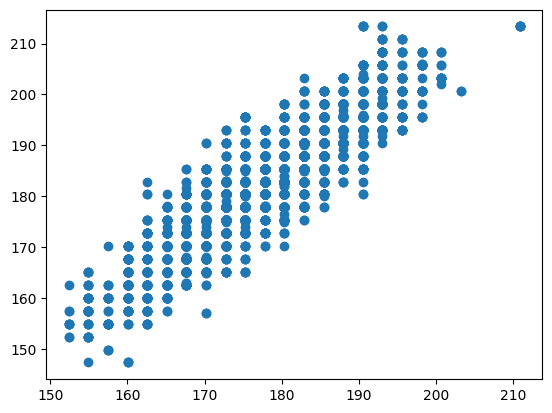

In [ ]:

#plt.scatter(heavyweight_data['Finish_dummy'], heavyweight_data['abs_ReachDif'])
plt.scatter(dataframe['BlueHeightCms'], dataframe['BlueReachCms'])

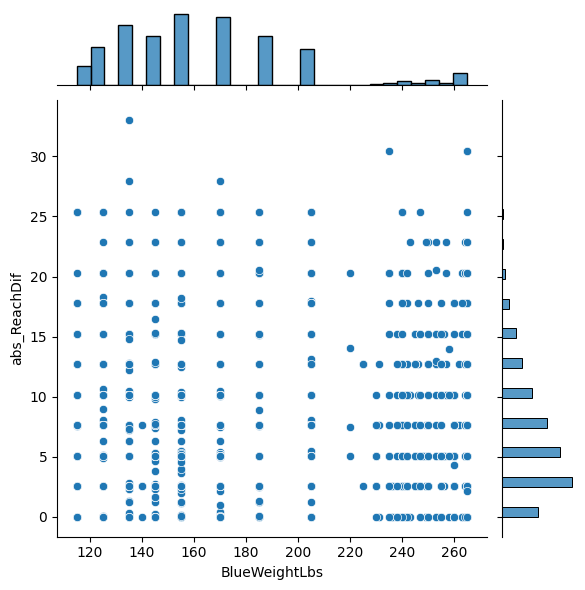

In [ ]:

sns.jointplot(data=dataframe, x='BlueWeightLbs', y='abs_ReachDif')



In [ ]:
formula_ko = "winner_dummy ~ ReachDif"

model_ko = sm.logit(formula_ko, data=dataframe)
ko_results = model_ko.fit()

print(ko_results.summary())

Optimization terminated successfully.
         Current function value: 0.678516
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           winner_dummy   No. Observations:                 5928
Model:                          Logit   Df Residuals:                     5926
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                0.002067
Time:                        22:43:08   Log-Likelihood:                -4022.2
converged:                       True   LL-Null:                       -4030.6
Covariance Type:            nonrobust   LLR p-value:                 4.469e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3262      0.026    -12.375      0.000      -0.378      -0.275
ReachDif       0.0130      0.